# Experiment 9: Singularity
Let's construct a dataset which contains singularity $f(x,y)=sin(log(x)+log(y))
 (x>0,y>0)$

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

sys.path.insert(0, parent_dir)

## Step 1 construct a dataset which contains singularity $f(x,y)=sin(log(x)+log(y))

In [2]:
from tensorkan.MultKAN import MultKAN as KANTF
import tensorflow as tf
import numpy as np
from tensorkan.utils import create_dataset

device = '/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'
print(f"Using device: {device}")

def f(x):
    return tf.math.sin(2 * (tf.math.log(x[:, 0:1]) + tf.math.log(x[:, 1:2])))




dataset = create_dataset(f, n_var=2, ranges=[0.2, 5])


model = KANTF(width=[2, 1, 1], grid=5, k=3, seed=2)

model.fit(dataset, opt="LBFGS", steps=20,lr=0.0001)



Using device: /CPU:0
checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.LBFGS` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.LBFGS`.
| train_loss: 1.24e-01 | test_loss: 1.47e-01 | reg: 6.41e+00 |: 100%|█| 20/20 [00:08<00:00,  2.41it/

Saving model version 0.1


{'train_loss': [0.36146536,
  0.23076788,
  0.1514382,
  0.12657239,
  0.12025742,
  0.15507968,
  0.1532398,
  0.14962019,
  0.14207257,
  0.10970613,
  0.1445385,
  0.13429248,
  0.12530516,
  0.12311008,
  0.122008726,
  0.15406999,
  0.14278941,
  0.13451885,
  0.12771833,
  0.12386442],
 'test_loss': [0.35473472,
  0.25073728,
  0.16382569,
  0.1299209,
  0.12273625,
  0.1550668,
  0.15349002,
  0.14916423,
  0.14197868,
  0.116887465,
  0.14951861,
  0.14758685,
  0.14465903,
  0.14395876,
  0.14271493,
  0.17182218,
  0.15852678,
  0.15187924,
  0.15023172,
  0.14743556],
 'reg': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.4084373]}

## Step 2 Show the model plot

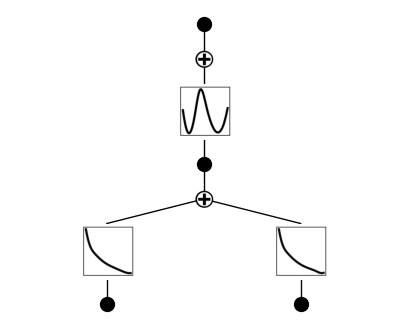

In [3]:
model.plot()

## Step 3 fix symbolic for the model to get an math expression

In [4]:
model.fix_symbolic(0,0,0,'log')
model.fix_symbolic(0,1,0,'log')
model.fix_symbolic(1,0,0,'sin')

r2 is 0.9995952248573303
Saving model version 0.2
Best value at boundary.
r2 is 0.9994297027587891
Saving model version 0.3
r2 is 0.9633826017379761
Saving model version 0.4


<tf.Tensor: shape=(), dtype=float32, numpy=0.9633826>

## Train Again to fit the Symbolic

In [5]:
model.fit(dataset, opt="LBFGS", steps=20,lr=0.0001)

description:   0%|                                                           | 0/20 [00:00<?, ?it/s]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.LBFGS` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.LBFGS`.
| train_loss: 1.60e-01 | test_loss: 1.69e-01 | reg: 6.43e+00 |: 100%|█| 20/20 [00:07<00:00,  2.59it/

Saving model version 0.5


{'train_loss': [0.16978993,
  0.16978993,
  0.16976388,
  0.16976386,
  0.16893446,
  0.16697577,
  0.1667126,
  0.16642192,
  0.16633558,
  0.16595383,
  0.16523762,
  0.16523264,
  0.16234298,
  0.16033925,
  0.16033925,
  0.1596573,
  0.15965731,
  0.1596573,
  0.15965728,
  0.15965728],
 'test_loss': [0.19221622,
  0.19221622,
  0.19232583,
  0.19232583,
  0.19128034,
  0.17468196,
  0.17464581,
  0.17793249,
  0.178489,
  0.18120888,
  0.1805046,
  0.18044847,
  0.16951713,
  0.16990037,
  0.16990039,
  0.16921118,
  0.1692112,
  0.16921118,
  0.16921118,
  0.1692112],
 'reg': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.427317]}

## Using exround to get the approximate math expression

In [6]:
from tensorkan.utils import ex_round
ex_round(model.symbolic_formula()[0][0], 3)

-0.97*sin(1.872*log(8.572*x_1 - 0.188) + 1.874*log(9.998*x_2 - 0.14) - 4.938) - 0.008

## singularity does not seem to be a problem in this case. But let's instead consider $f(x,y)=\sqrt{x^2+y^2}$. $x=y=0$ is a singularity point.

In [40]:

def f(x):
    return tf.math.sqrt(x[:, 0:1] ** 2 + x[:, 1:2] ** 2)


dataset = create_dataset(f, n_var=2, ranges=[-1, 1])


model = KANTF(width=[2, 1, 1], grid=5, k=3, seed=0)


model.fit(dataset, opt="LBFGS", steps=20,lr = 0.0001)



checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.LBFGS` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.LBFGS`.
| train_loss: 2.78e-03 | test_loss: 3.91e-03 | reg: 5.38e+00 |: 100%|█| 20/20 [00:09<00:00,  2.16it/

Saving model version 0.1


{'train_loss': [0.077796936,
  0.027835522,
  0.019481376,
  0.010988378,
  0.009708695,
  0.007550315,
  0.007326649,
  0.007326649,
  0.007326649,
  0.007326649,
  0.005514417,
  0.0041357228,
  0.0039648125,
  0.0034406662,
  0.0033663115,
  0.002830373,
  0.0028266155,
  0.0028266155,
  0.0027767282,
  0.0027767266],
 'test_loss': [0.07562261,
  0.027344406,
  0.01885721,
  0.011062081,
  0.010265901,
  0.008178835,
  0.007859152,
  0.007859152,
  0.007859152,
  0.007859152,
  0.0060971575,
  0.0048585627,
  0.004734154,
  0.004516141,
  0.0044457666,
  0.003957861,
  0.0039545246,
  0.003954525,
  0.0039060162,
  0.003906015],
 'reg': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  5.384618]}

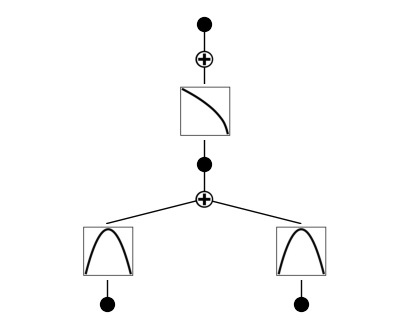

In [41]:
model.plot()

In [42]:
model.fix_symbolic(0,0,0,'x^2')
model.fix_symbolic(0,1,0,'x^2')
model.fix_symbolic(1,0,0,'sqrt')

r2 is 0.9999991059303284
Saving model version 0.2
r2 is 0.9999974966049194
Saving model version 0.3
r2 is 0.9998950958251953
Saving model version 0.4


<tf.Tensor: shape=(), dtype=float32, numpy=0.9998951>

In [43]:
formula = model.symbolic_formula()[0][0]
formula

1.00713472485531*sqrt((0.000179201583773068 - x_2)**2 + 0.999733616425669*(-x_1 - 0.00014508571598039)**2 + 0.00478362966783646) - 0.0092315673828125

In [44]:
ex_round(formula, 2)

1.01*sqrt(1.0*x_1**2 + x_2**2) - 0.e-2

### In this case, it shows an "good-looking" but wrong approximate math expression. 
### However, we found out that using kan may fail in some singularity case. However, using adam may help overcome this problem.